In [4]:
# IBM_HR_Attrition_Rate_Analytics
# EDA Analysis

!pip install feature-engine

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import lightgbm as lgb

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from feature_engine.encoding import DecisionTreeEncoder, CountFrequencyEncoder, WoEEncoder, RareLabelEncoder

  Using cached feature_engine-1.3.0-py2.py3-none-any.whl (260 kB)


In [3]:
# To set display options
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300

warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
# Data Loading 
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# Data View
df.info()
df.dtypes
df.isna().sum()
df.duplicated().sum()
df.shape
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)
df[numeric_columns].describe()
df[categorical_columns].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


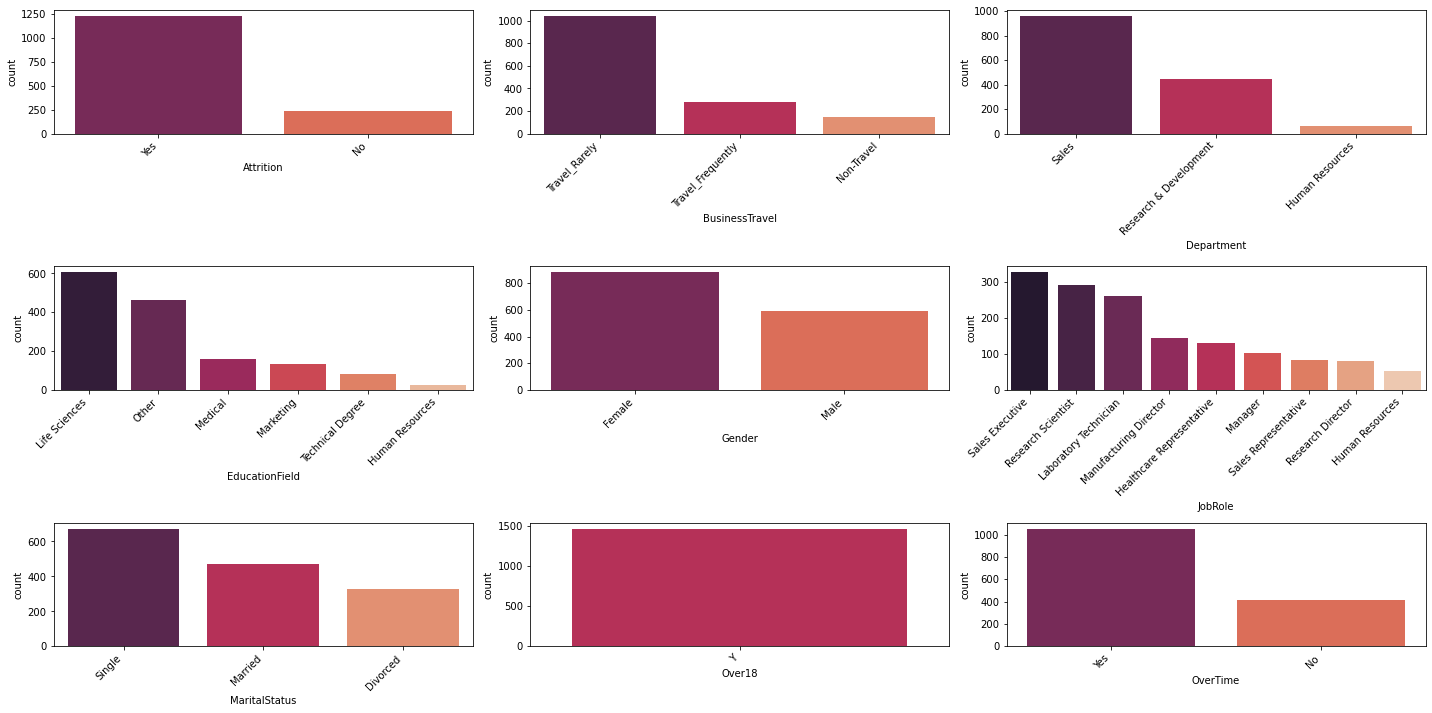

In [8]:
#Univariate Plot

fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

In [ ]:
"""Over18 only have one Value
 Attrition is heavily unbalanced
 Most of the employees travel rarely
 Most of the employees work overtimes
 There are more females than males"""


C:\Users\FJ795RQ\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\FJ795RQ\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


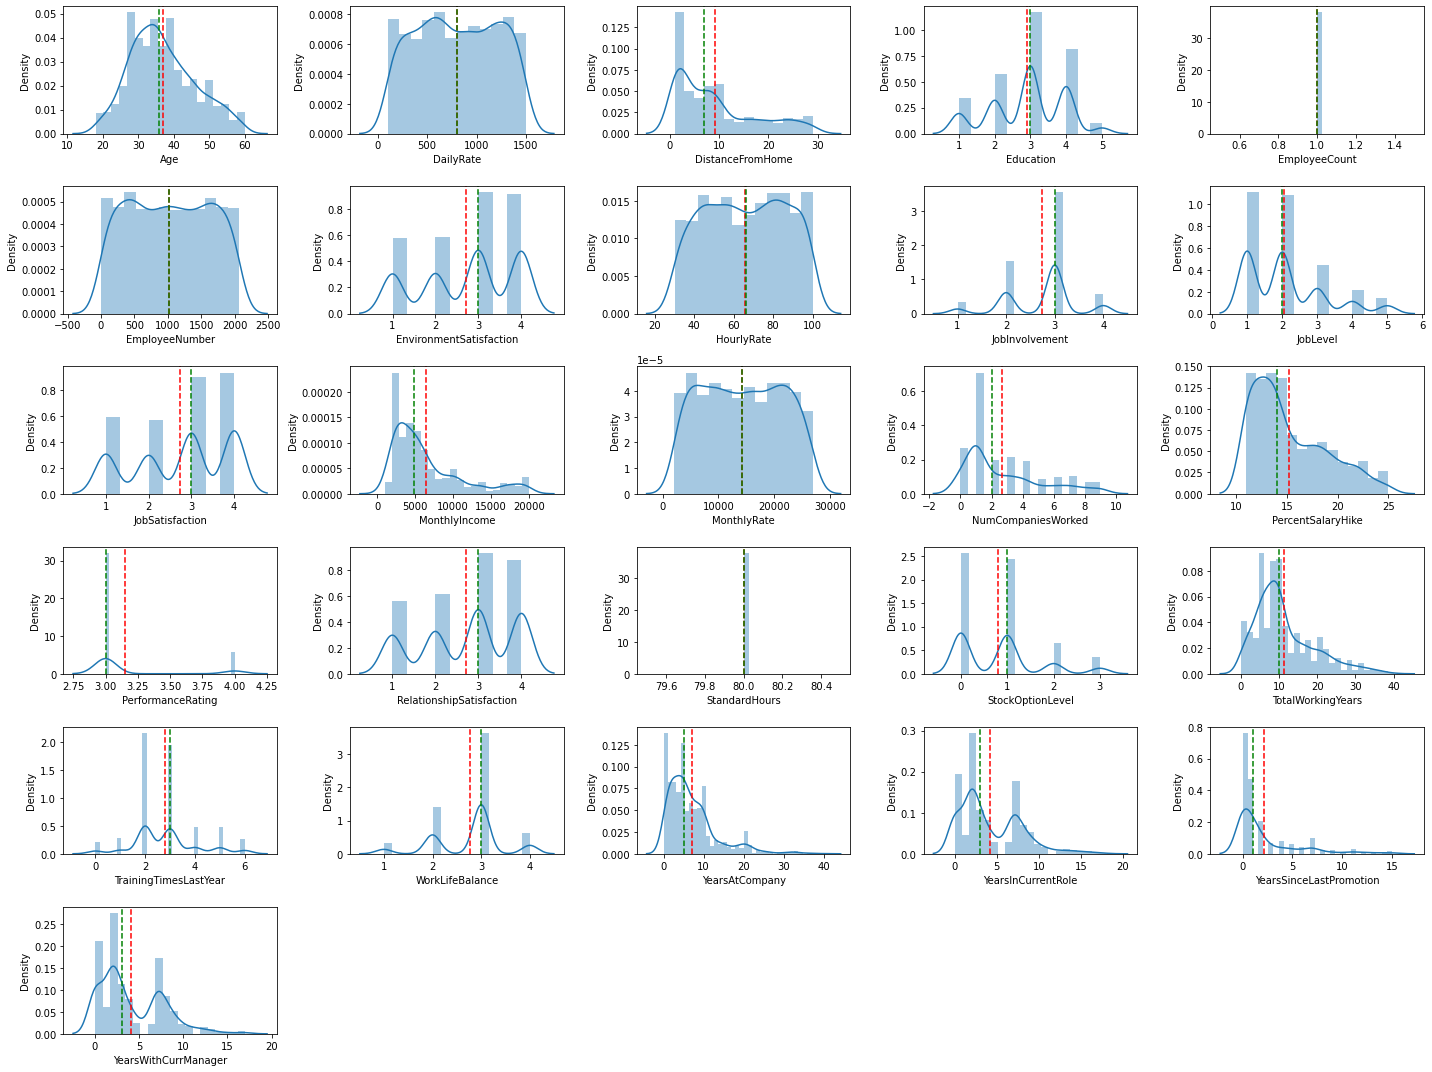

In [9]:
def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")

fig, ax = plt.subplots(6,5, figsize = (20,15))

ax = np.ravel(ax)
for i in range(len(numeric_columns)):
    make_distplot(df, numeric_columns[i], ax[i])
for i in range(len(numeric_columns), 6*5):
    ax[i].axis("off")
ax = np.reshape(ax, (6, 5))
plt.tight_layout()


In [ ]:
"""There are employees which work for over 10 years without a promotion which is quite strange
 The performance rating of the employees isn't the best with ~ 3.0 as a median """


C:\Users\FJ795RQ\AppData\Local\Temp/ipykernel_39588/922846178.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

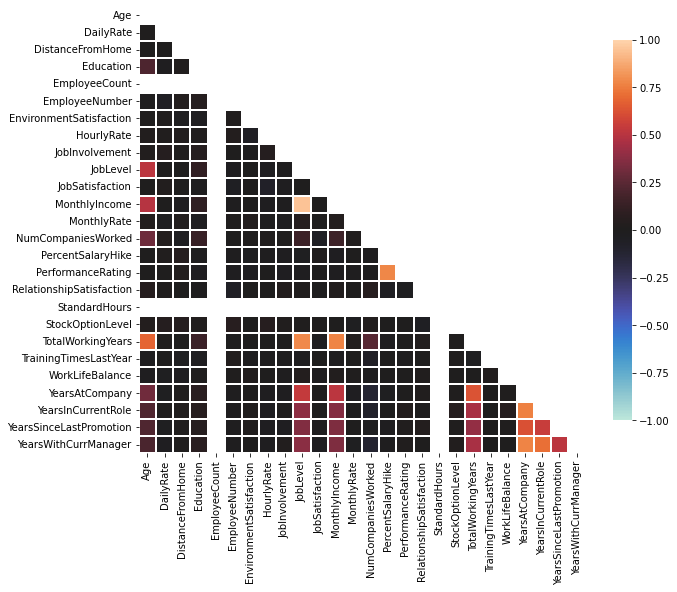

In [10]:

corr = df[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette("icefire", as_cmap=True)

sns.heatmap(corr, mask = mask, cmap = cmap, annot=False, fmt= '.2f', vmin=-1, vmax=1, square = True, linewidth=2, cbar_kws={"shrink": 0.7}, ax=ax)


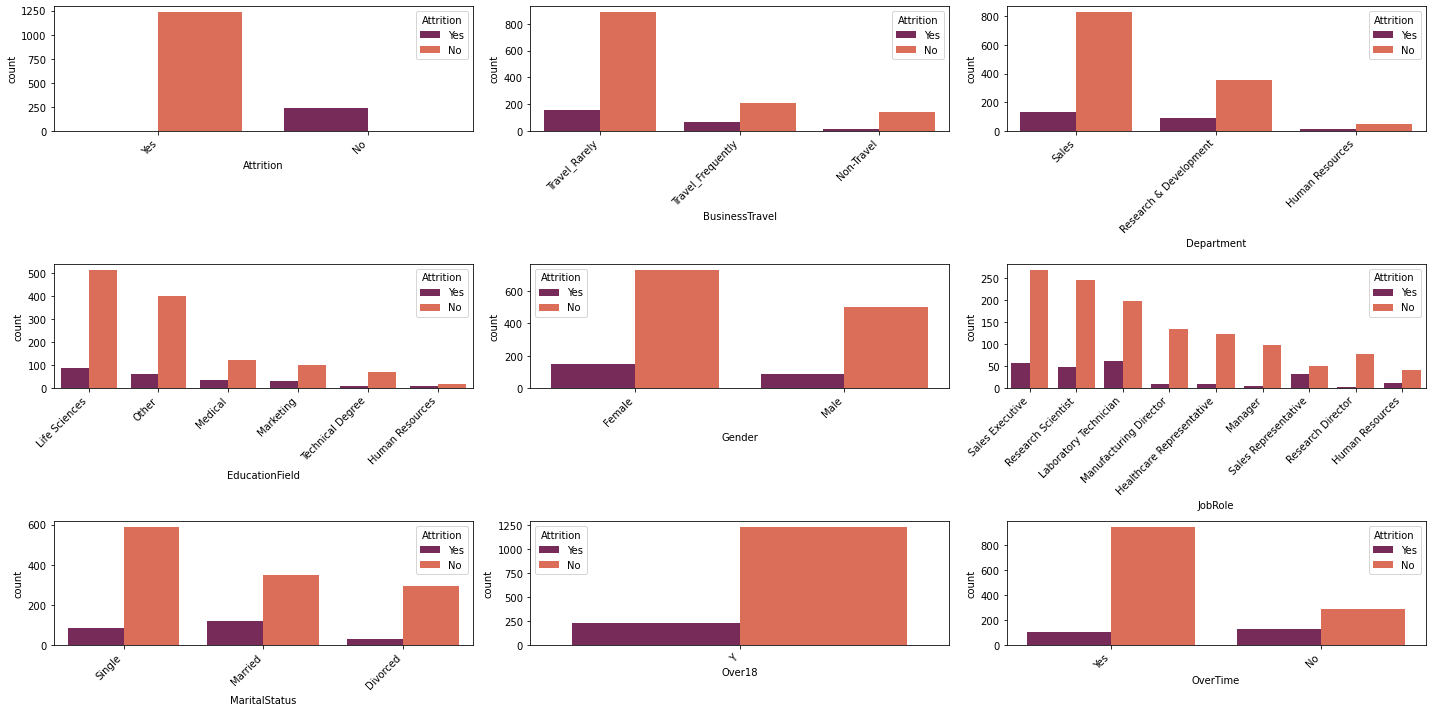

In [11]:
# correlations among the numerical columns
"""High correlation between Age and JobLevel, MonthlyIncome and TotalWorkingYears
High correlation between JobLevel and MonthlyIncome
High correlation between TotalWorkingYears and YearsSinceLastPromotion -> The longer you are working, the higher is the probability that you reached your "limit" in terms of promotion"""

fig, ax = plt.subplots(3,3, figsize = (20,10))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], hue="Attrition", ax = ax[i], palette="rocket", order = df[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = df[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

In [13]:
"""Nearly half of the Sales Representatives went from the company away
Most of the people were traveling rarely and Sales is the department with the highest attrition (but also with the most employees overall)"""

df.groupby("Gender")["YearsSinceLastPromotion"].mean()

df.groupby("Gender")["PerformanceRating"].mean()

#Females are waiting a bit longer for a promotion than men, although having a better performance rating

Gender
Female    3.159864
Male      3.149660
Name: PerformanceRating, dtype: float64

In [14]:
# Data Preprocessing

# Drop unnecessary columns

df = df.drop(["Over18", "EmployeeCount", "StandardHours"], axis=1)
X = df.loc[:, df.columns != "Attrition"].copy()
y = df.loc[:, "Attrition"].copy()

In [15]:
# Label Encoding for Target Attrition

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.DataFrame(y, index=df.index, columns=["Attrition"])
categorical_cols_features = list(X.select_dtypes(include="object").columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, shuffle = True)


In [16]:
# Rare Label Encoding

# Grouping Labels which have a low amount of observations. They will go into a new category named "Rare" to prevent overfitting

def rare_encoding(X_train, X_test):
    rare_encoder = RareLabelEncoder(
                    tol = 0.05, # Threshold: Labels with a frequency < tol will be grouped
                    n_categories = 4,  # minimum categories required for encoding
                    variables = categorical_cols_features)
    
    rare_encoder.fit(X_train)
    X_train_rare_encoded = rare_encoder.transform(X_train)
    X_test_rare_encoded = rare_encoder.transform(X_test)
    
    return X_train_rare_encoded, X_test_rare_encoded

X_train_rare, X_test_rare = rare_encoding(X_train, X_test)

X_train["EducationField"].value_counts(normalize=True)

X_train[X_train["EducationField"] == "Human Resources"]["EducationField"].head()

X_train_rare[(X_train_rare["EducationField"] == 'Rare')]["EducationField"]

C:\Users\FJ795RQ\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:174: UserWarning: The number of unique categories for variable BusinessTravel is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\FJ795RQ\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:174: UserWarning: The number of unique categories for variable Department is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\FJ795RQ\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:174: UserWarning: The number of unique categories for variable Gender is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
C:\Users\FJ795RQ\Anaconda3\lib\site-packages\feature_engine\encoding\rare_label.py:174: UserWarning: The number of unique categories for variable MaritalStatus is less than that indicated in n_cat

100     Rare
1165    Rare
613     Rare
139     Rare
599     Rare
826     Rare
105     Rare
1228    Rare
1313    Rare
440     Rare
1401    Rare
999     Rare
1289    Rare
1379    Rare
1246    Rare
655     Rare
1312    Rare
112     Rare
863     Rare
Name: EducationField, dtype: object

In [ ]:

# Now that we have done Rare Encoding Need to look at the other techniques other than Ordinal Encoding or One Hot Encoding

"""First Need to write our function for the three different techniques:
Frequency Encoding
Decision Tree Encoding
Weight of Evidence (WoE) Encoding"""

In [17]:
def encoding(X_train, X_test, y_train, method=None):
    if method:
        if method == "frequency":
            freq_encoder = CountFrequencyEncoder(encoding_method='frequency',variables=categorical_cols_features)
            freq_encoder.fit(X_train)
            X_train_encoded = freq_encoder.transform(X_train)
            X_test_encoded = freq_encoder.transform(X_test)
            
        elif method == "decisiontree":
            dt_encoder = DecisionTreeEncoder(
            variables=categorical_cols_features,
            encoding_method='arbitrary', 
            cv=3,
            scoring='f1',
            param_grid={'max_depth': [i for i in range (3, 7)]}, # Grid search parameters
            regression=False) 
            
            dt_encoder.fit(X_train, y_train)
            X_train_encoded = dt_encoder.transform(X_train)
            X_test_encoded = dt_encoder.transform(X_test)
            
        elif method == "woe":
            woe_encoder = WoEEncoder(variables=categorical_cols_features)
            woe_encoder.fit(X_train, y_train.iloc[:, 0]) 
            X_train_encoded = woe_encoder.transform(X_train)
            X_test_encoded = woe_encoder.transform(X_test)
            
        return X_train_encoded, X_test_encoded
    

In [21]:
 # Frequency Encoding
    
#Categories will be replaced by the percentage of observations per category.E.g. Category Life Sciences have a proportion of 0.41 so Life Sciences will be replaced by 0.41"""

X_train_freq_encoded, X_test_freq_encoded = encoding(X_train, X_test, y_train, method="frequency")
X_train_freq_encoded[categorical_cols_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1343,0.710526,0.654265,0.413793,0.597096,0.175136,0.307623,0.707804
1121,0.710526,0.304900,0.413793,0.402904,0.215064,0.307623,0.707804
1048,0.710526,0.304900,0.061706,0.597096,0.215064,0.307623,0.707804
1393,0.710526,0.304900,0.106171,0.597096,0.215064,0.307623,0.707804
527,0.710526,0.304900,0.106171,0.597096,0.215064,0.307623,0.707804


In [22]:
# Decision Tree Encoding
"""The Decision Tree Encoder encodes categorical variables with predictions of a decision tree model. The encoder fits 
a Decision Tree with a single feature and the target,and then replaces the original categories by the predictions"""

X_train_dt_encoded, X_dt_freq_encoded = encoding(X_train, X_test, y_train, method="decisiontree")
X_train_dt_encoded[categorical_cols_features].head()

C:\Users\FJ795RQ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1343,0.166028,0.148405,0.151316,0.185410,0.259067,0.289086,0.105128
1121,0.166028,0.217262,0.151316,0.150901,0.137313,0.289086,0.105128
1048,0.166028,0.217262,0.205405,0.185410,0.137313,0.289086,0.105128
1393,0.166028,0.217262,0.205405,0.185410,0.137313,0.289086,0.105128
527,0.166028,0.217262,0.205405,0.185410,0.137313,0.289086,0.105128


In [23]:
# WoE Encoding

"""WoE is calculated by taking the natural logarithm of division of % of non-events and % of events

WOE = In(% of non-events ➗ % of events)"""

y_train.iloc[:, 0]

X_train_woe_encoded, X_test_woe_encoded = encoding(X_train, X_test, y_train, method="woe")

X_train_woe_encoded.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1343,29,-0.039054,592,-0.172177,7,3,-0.149329,1883,4,0.094876,59,3,1,0.524167,1,0.675159,2062,19384,3,-0.566511,14,3,2,0,11,2,3,3,2,1,2
1121,36,-0.039054,884,0.293294,1,4,-0.149329,1585,2,-0.152564,73,3,2,0.010446,3,0.675159,6815,21447,6,-0.566511,13,3,1,0,15,5,3,1,0,0,0
1048,34,-0.039054,1326,0.293294,3,3,-0.070167,1478,4,0.094876,81,1,2,0.010446,1,0.675159,4759,15891,3,-0.566511,18,3,4,0,15,2,3,13,9,3,12
1393,27,-0.039054,954,0.293294,9,3,0.371016,1965,4,0.094876,44,3,2,0.010446,4,0.675159,4105,5099,1,-0.566511,14,3,1,0,7,5,3,7,7,0,7
527,32,-0.039054,929,0.293294,10,3,0.371016,722,4,0.094876,55,3,2,0.010446,4,0.675159,5396,21703,1,-0.566511,12,3,4,0,10,2,2,10,7,0,8


In [24]:
#Evaluate the three different techniques

scoring = ["roc_auc", "f1", "balanced_accuracy"]

In [25]:
# With Frequency Encoding

model_1 = LogisticRegression(random_state = 42, solver='liblinear')

scores_1 = cross_validate(model_1, X_train_freq_encoded, y_train.values.ravel(), scoring = scoring, cv=3)

scores_1["test_f1"].mean()

0.21516182849516183

In [26]:
# With Decision Tree Encoding

model_2 = LogisticRegression(random_state = 42, solver='liblinear')

scores_2 = cross_validate(model_2, X_train_dt_encoded, y_train.values.ravel(), scoring = scoring, cv=3)

scores_2["test_f1"].mean()


0.193987016200448

In [27]:
# With WoE Encoding

model_3 = LogisticRegression(random_state = 42, solver='liblinear')

scores_3 = cross_validate(model_3, X_train_woe_encoded, y_train.values.ravel(), scoring = scoring, cv=3)

scores_3["test_f1"].mean()


0.5195204322863897